In [1]:
# Libraries for data manipulation and visualization

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Libraries for model building and evaluation

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
# Saving the model

import joblib

In [4]:
# Load dataset

file_path = 'python files/capstone - ML Project/Taiwan Air Quality Index Data .csv'
data = pd.read_csv('Taiwan Air Quality Index Data .csv')

In [5]:
print("Dataset Overview:")
print(data.info())
print(data.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62964 entries, 0 to 62963
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       62964 non-null  object 
 1   sitename   62964 non-null  object 
 2   county     62964 non-null  object 
 3   aqi        62943 non-null  float64
 4   pollutant  9088 non-null   object 
 5   status     62910 non-null  object 
 6   so2        61701 non-null  float64
 7   co         62302 non-null  float64
 8   o3         62161 non-null  float64
 9   o3_8hr     62638 non-null  float64
 10  pm10       62298 non-null  float64
 11  pm2.5      62241 non-null  float64
 12  no2        61955 non-null  float64
 13  nox        61955 non-null  float64
 14  no         61955 non-null  float64
 15  windspeed  62704 non-null  object 
 16  winddirec  62681 non-null  object 
 17  unit       0 non-null      float64
 18  co_8hr     62790 non-null  float64
 19  pm2.5_avg  62664 non-null  f

In [6]:
#Data Preprocessing and Cleaning

# Handling missing values
data = data.dropna(subset=['aqi', 'pm2.5'])  
num_cols = data.select_dtypes(include=np.number).columns
cat_cols = data.select_dtypes(exclude=np.number).columns

In [7]:
print(data.head())

# Verify that missing values are handled
print(f"Missing values in numerical columns:\n{data[num_cols].isnull().sum()}")
print(f"Missing values in categorical columns:\n{data[cat_cols].isnull().sum()}")


            date  sitename          county   aqi pollutant status  so2    co  \
0  8/1/2024 0:00     Sanyi   Miaoli County  22.0       NaN   Good  0.6  0.11   
1  8/1/2024 0:00     Shalu   Taichung City  21.0       NaN   Good  0.8  0.17   
2  8/1/2024 0:00  Fengyuan   Taichung City  18.0       NaN   Good  0.9  0.19   
3  8/1/2024 0:00   Zhudong  Hsinchu County  26.0       NaN   Good  0.4  0.16   
4  8/1/2024 0:00    Miaoli   Miaoli County  19.0       NaN   Good  0.3  0.11   

     o3  o3_8hr  ...  windspeed  winddirec  unit  co_8hr  pm2.5_avg pm10_avg  \
0  17.3    18.6  ...        3.8        184   NaN     0.1        6.9     12.0   
1  14.1    18.0  ...        2.3        176   NaN     0.1        6.6     16.0   
2  20.0    19.6  ...        3.6        172   NaN     0.2        4.1     11.0   
3   7.9    13.0  ...        0.2        201   NaN     0.2        8.0     19.0   
4  17.6    19.7  ...        3.9        205   NaN     0.1        5.9     11.0   

  so2_avg   longitude   latitude  site

In [8]:
data = data.drop(['siteid', 'sitename'], axis=1)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 62240 entries, 0 to 62963
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       62240 non-null  object 
 1   county     62240 non-null  object 
 2   aqi        62240 non-null  float64
 3   pollutant  9021 non-null   object 
 4   status     62237 non-null  object 
 5   so2        61239 non-null  float64
 6   co         61806 non-null  float64
 7   o3         61709 non-null  float64
 8   o3_8hr     61988 non-null  float64
 9   pm10       61877 non-null  float64
 10  pm2.5      62240 non-null  float64
 11  no2        61504 non-null  float64
 12  nox        61504 non-null  float64
 13  no         61504 non-null  float64
 14  windspeed  62069 non-null  object 
 15  winddirec  62047 non-null  object 
 16  unit       0 non-null      float64
 17  co_8hr     62116 non-null  float64
 18  pm2.5_avg  62155 non-null  float64
 19  pm10_avg   62153 non-null  float64
 20  so2_avg    

In [33]:
num_cols = data.select_dtypes(include=np.number).columns
cat_cols = data.select_dtypes(exclude=np.number).columns

print("\nDescriptive Statistics:")
print(data.describe())

print("\nCategorical Columns Summary:")
print(data.describe(include=['O']))


Descriptive Statistics:
                aqi           so2            co            o3        o3_8hr  \
count  62240.000000  62240.000000  62240.000000  62240.000000  62240.000000   
mean      35.714203      1.014569      0.226964     25.063191     25.063139   
std       13.777386      0.788271      0.180064     15.709997     13.144411   
min       -1.000000      0.000000      0.000000      0.000000      0.000000   
25%       26.000000      0.600000      0.140000     12.900000     15.100000   
50%       34.000000      0.900000      0.180000     22.500000     23.300000   
75%       44.000000      1.300000      0.250000     34.100000     32.900000   
max      136.000000     27.100000      4.320000    133.400000     81.500000   

               pm10         pm2.5           no2           nox            no  \
count  62240.000000  62240.000000  62240.000000  62240.000000  62240.000000   
mean      20.150257     10.277715      7.159745      9.648792      2.446126   
std        8.763115      5

In [27]:
# Impute missing values

numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

data = data.drop_duplicates()


In [29]:
# Missing values

print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
date             0
county           0
aqi              0
pollutant        0
status           0
so2              0
co               0
o3               0
o3_8hr           0
pm10             0
pm2.5            0
no2              0
nox              0
no               0
windspeed        0
winddirec        0
unit         62240
co_8hr           0
pm2.5_avg        0
pm10_avg         0
so2_avg          0
longitude        0
latitude         0
dtype: int64


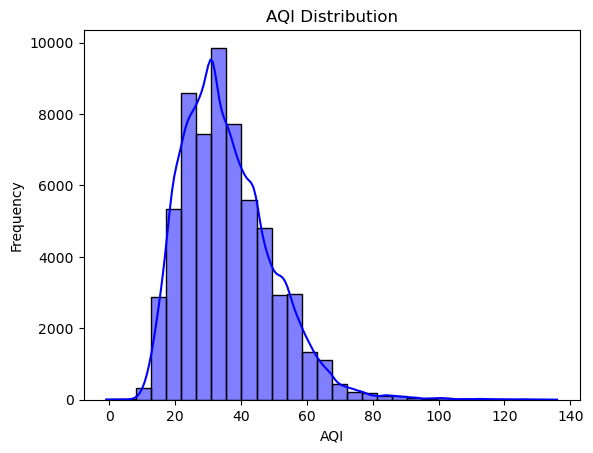

In [35]:
# Exploratory Data Analysis (EDA)

# Distribution of AQI
sns.histplot(data['aqi'], kde=True, bins=30, color='blue')
plt.title("AQI Distribution")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.show()


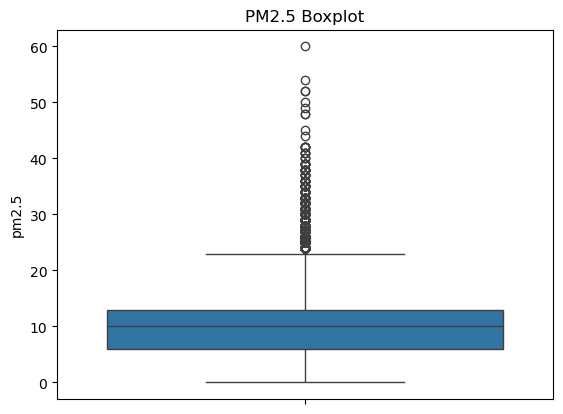

In [37]:
# Boxplot for PM2.5

sns.boxplot(data['pm2.5'])
plt.title("PM2.5 Boxplot")
plt.show()

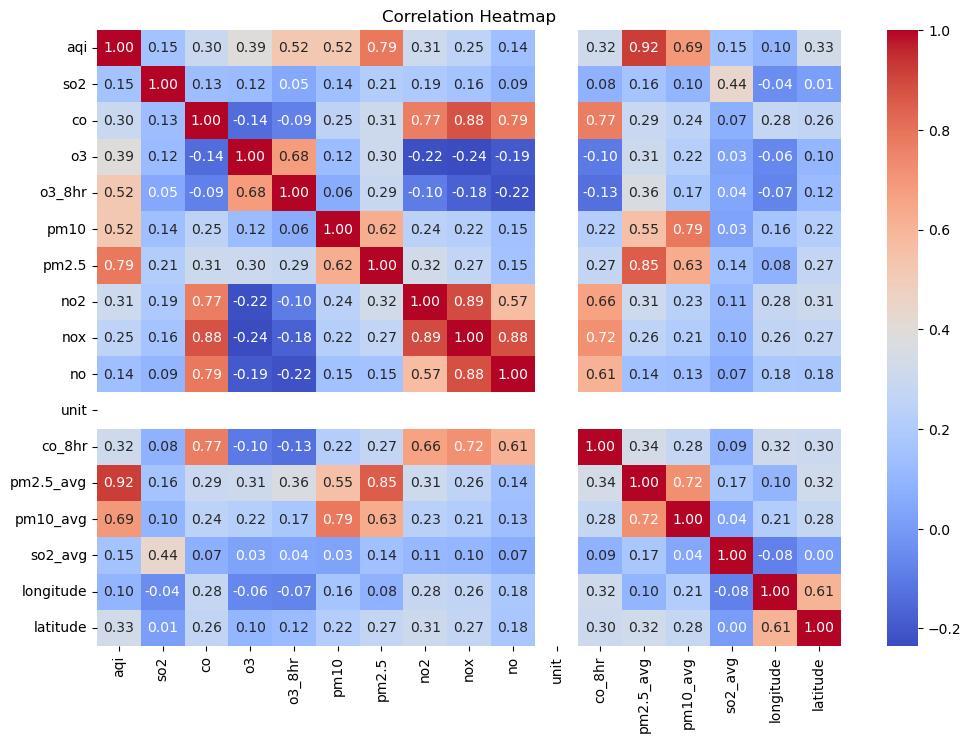

In [45]:
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# Correlation Heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

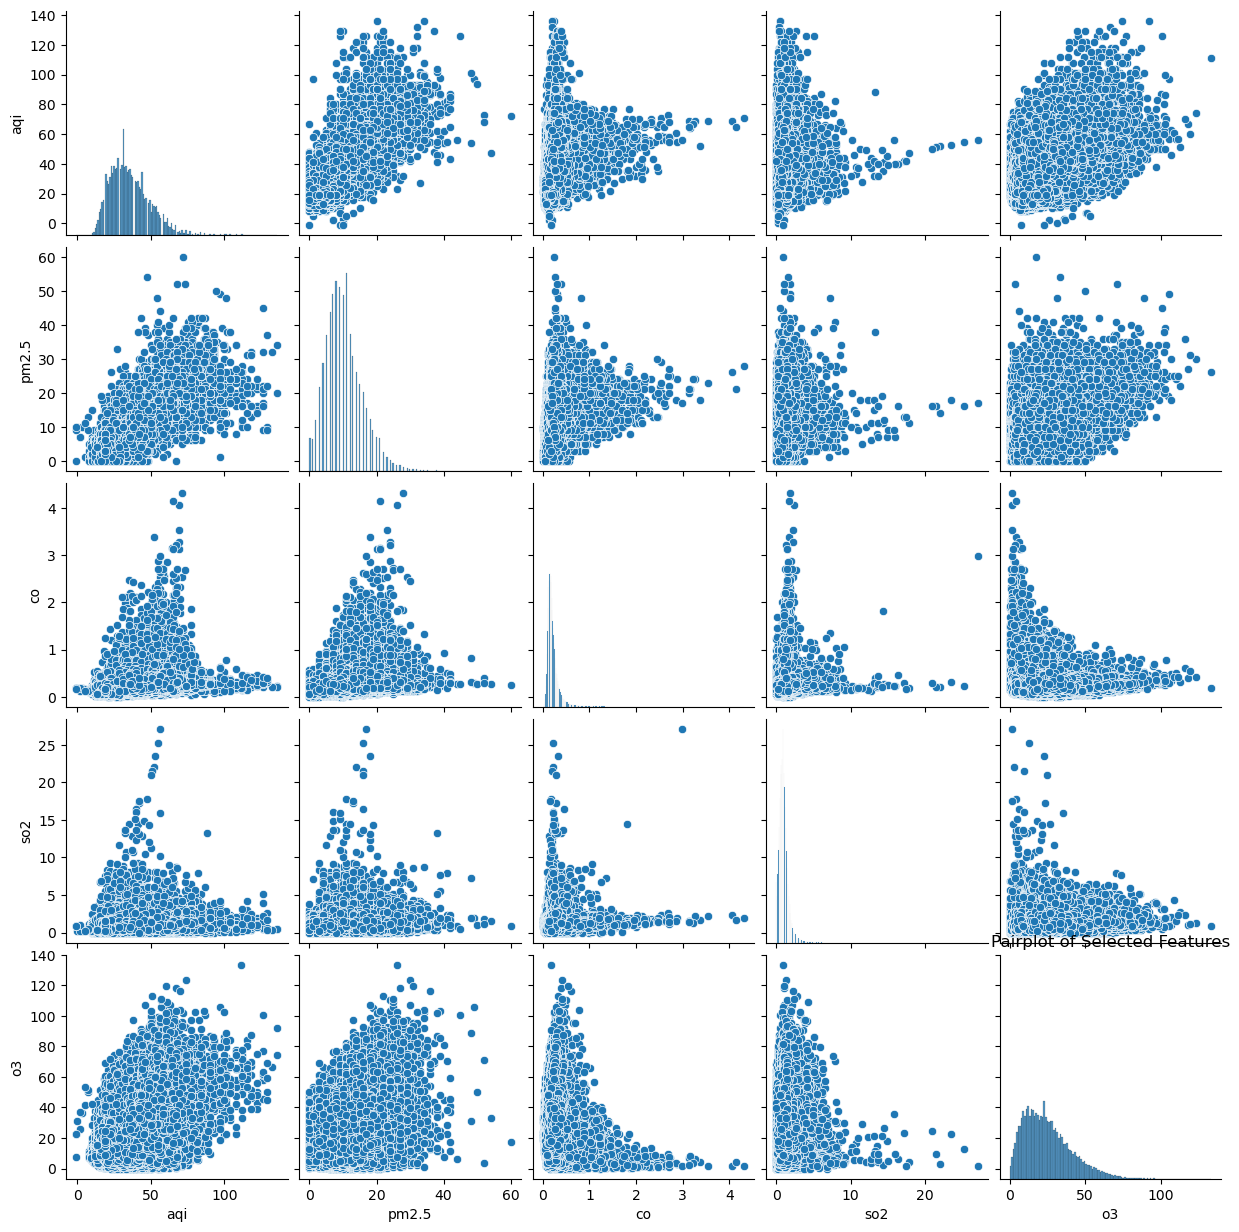

In [47]:
# Pairplot for selected features

selected_features = ['aqi', 'pm2.5', 'co', 'so2', 'o3']
sns.pairplot(data[selected_features])
plt.title("Pairplot of Selected Features")
plt.show()

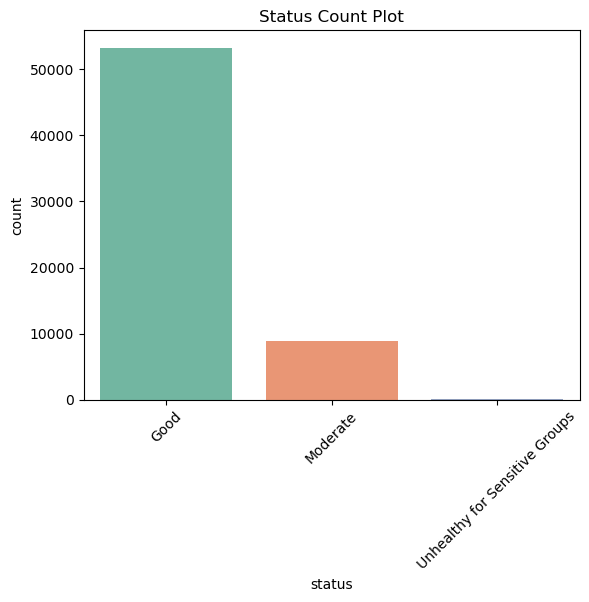

In [51]:
# Count plot for 'status'

sns.countplot(x='status', data=data, palette='Set2', hue='status', dodge=False, legend=False)
plt.title("Status Count Plot")
plt.xticks(rotation=45)
plt.show()

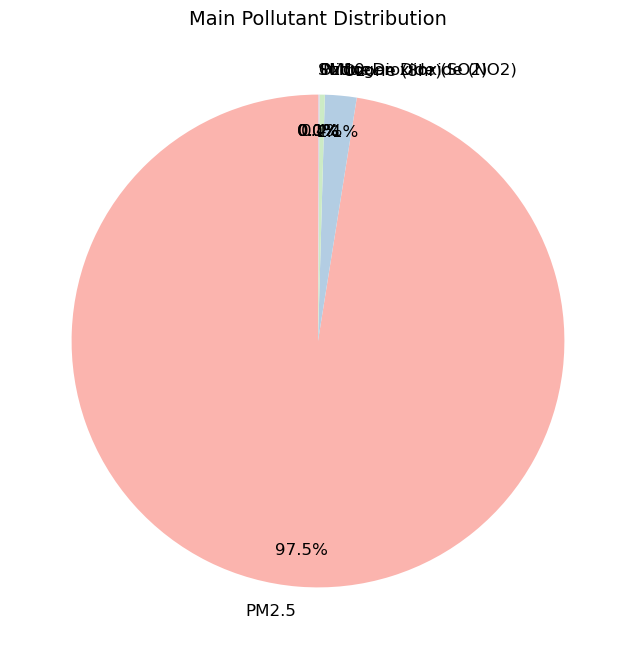

In [55]:
# Pie chart for 'pollutant'

pollutant_counts = data['pollutant'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(
    pollutant_counts, 
    labels=pollutant_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=plt.cm.Pastel1.colors,
    textprops={'fontsize': 12},  
    pctdistance=0.85,  
    labeldistance=1.1 )
plt.title("Main Pollutant Distribution", fontsize=14)
plt.show()

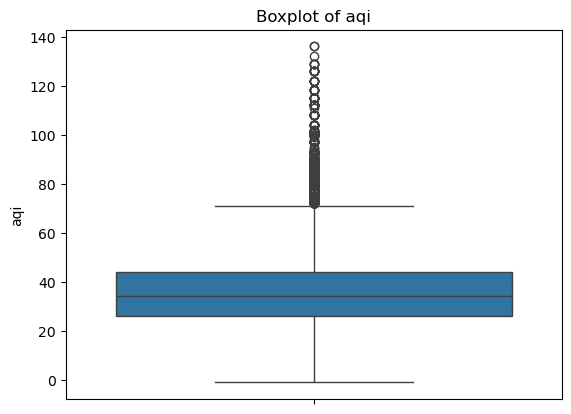

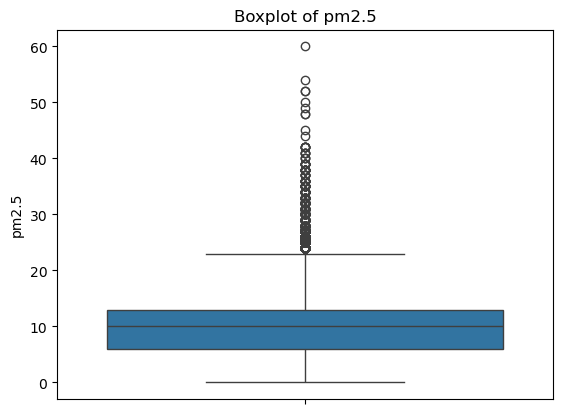

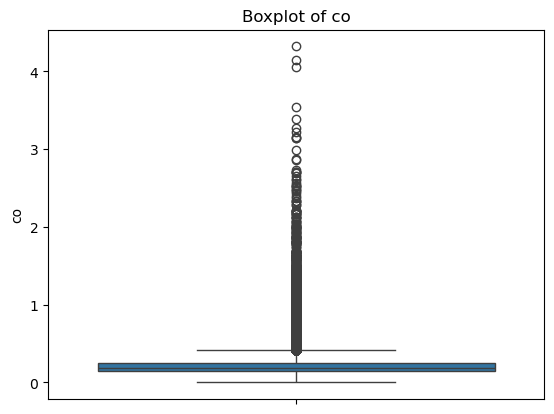

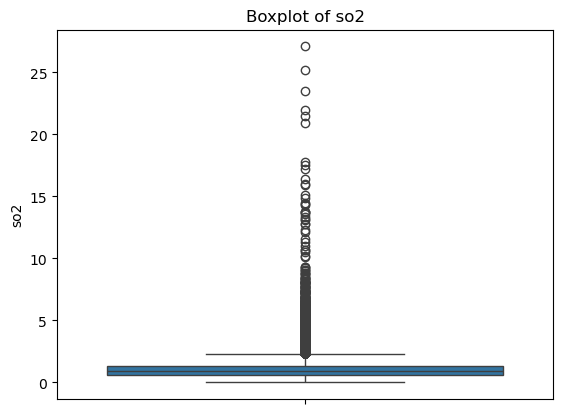

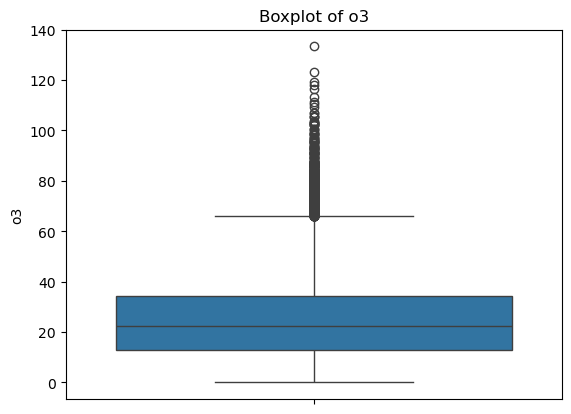

In [57]:
# Boxplot for detecting outliers in numerical features

numerical_features = ['aqi', 'pm2.5', 'co', 'so2', 'o3']
for feature in numerical_features:
    sns.boxplot(data[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()

In [59]:
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])
    data.set_index('date', inplace=True)


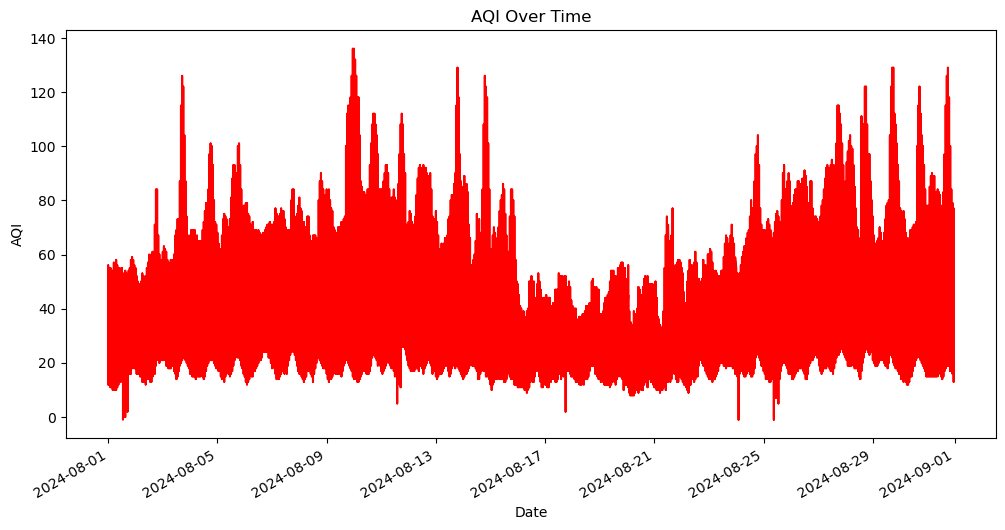

In [63]:
# Line plot for AQI over time

data['aqi'].plot(figsize=(12, 6), title="AQI Over Time", color='red')
plt.xlabel("Date")
plt.ylabel("AQI")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23280\289606585.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pollutant_counts.index, y=pollutant_counts.values, palette='coolwarm', hue=None)


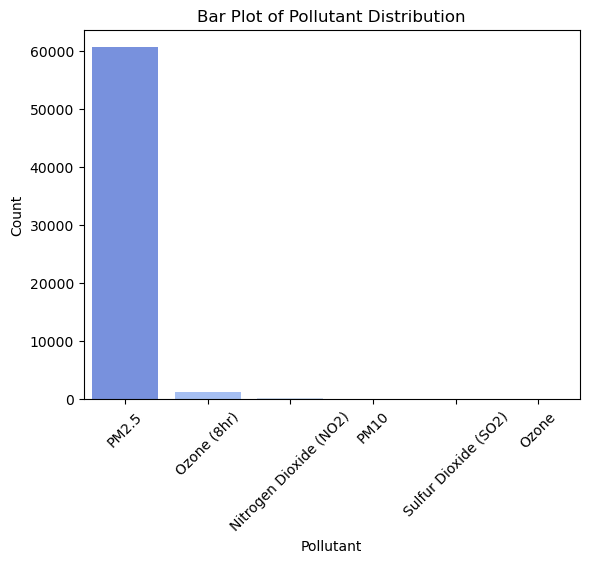

In [75]:
# Bar plot for pollutant distribution

pollutant_counts = data['pollutant'].value_counts()
sns.barplot(x=pollutant_counts.index, y=pollutant_counts.values, palette='coolwarm', hue=None)
plt.title("Bar Plot of Pollutant Distribution")
plt.xlabel("Pollutant")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

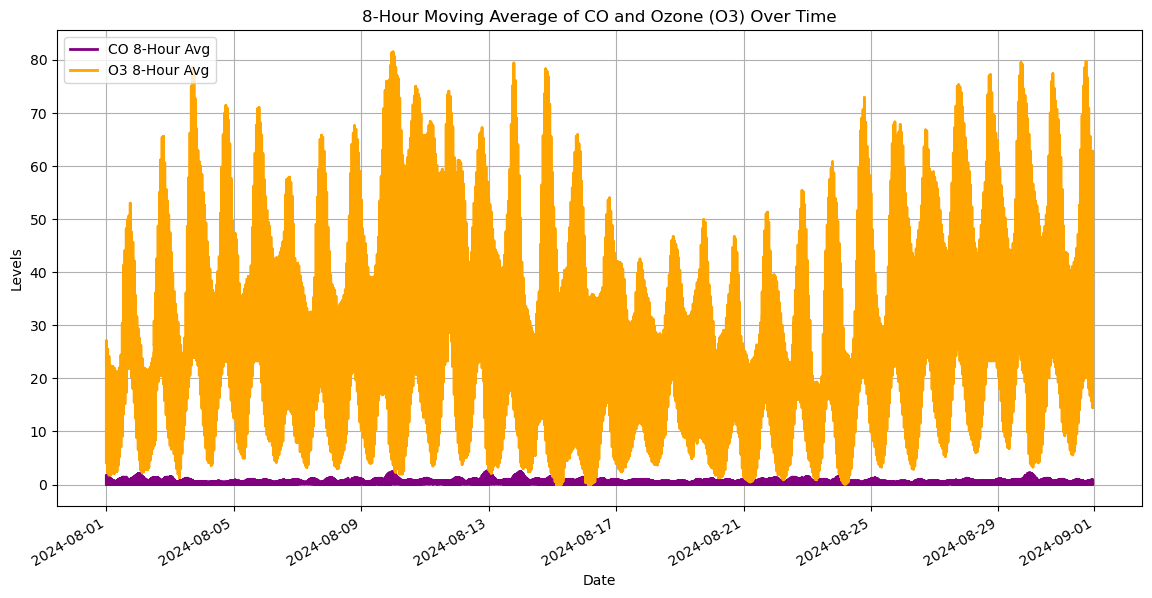

In [85]:
# Line Plot for 8-hour moving averages of pollutants over time

if all(col in data.columns for col in ['co_8hr', 'o3_8hr']):
    plt.figure(figsize=(14, 7))
    data['co_8hr'].plot(label='CO 8-Hour Avg', color='purple', linewidth=2)
    data['o3_8hr'].plot(label='O3 8-Hour Avg', color='orange', linewidth=2)

    plt.title("8-Hour Moving Average of CO and Ozone (O3) Over Time")
    plt.xlabel("Date")
    plt.ylabel("Levels")
    plt.legend()
    plt.grid(True)
    plt.show()

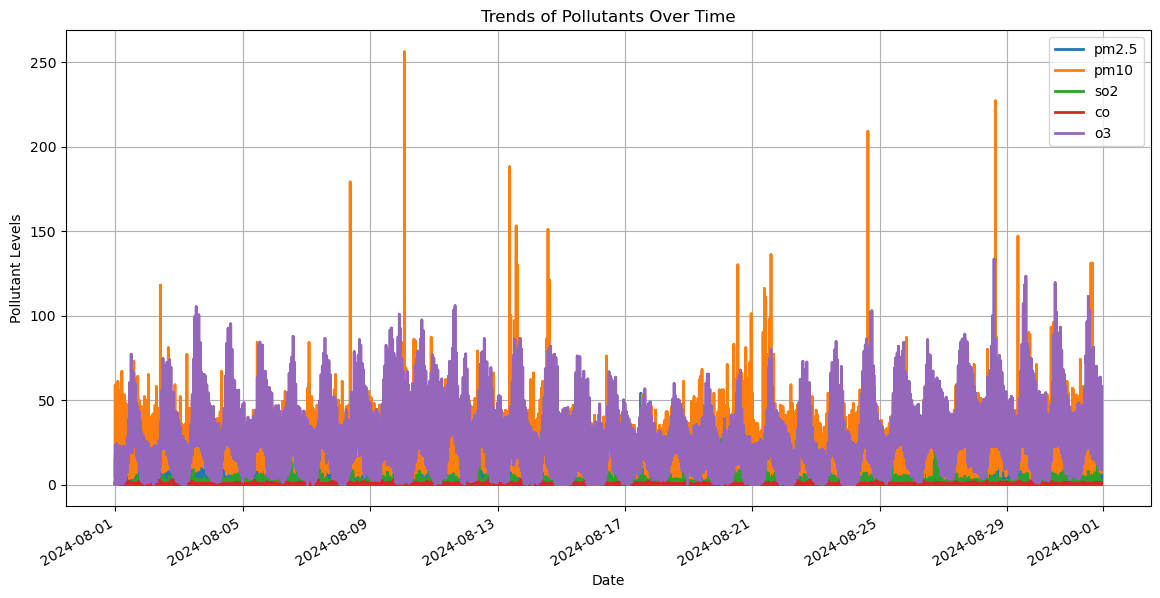

In [87]:
# Line Plot for multiple pollutants over time

pollutants = ['pm2.5', 'pm10', 'so2', 'co', 'o3']
if all(pollutant in data.columns for pollutant in pollutants):
    plt.figure(figsize=(14, 7))
    for pollutant in pollutants:
        data[pollutant].plot(label=pollutant, linewidth=2)

    plt.title("Trends of Pollutants Over Time")
    plt.xlabel("Date")
    plt.ylabel("Pollutant Levels")
    plt.legend()
    plt.grid(True)
    plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23280\2243428818.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['aqi'], shade=True, color='blue')


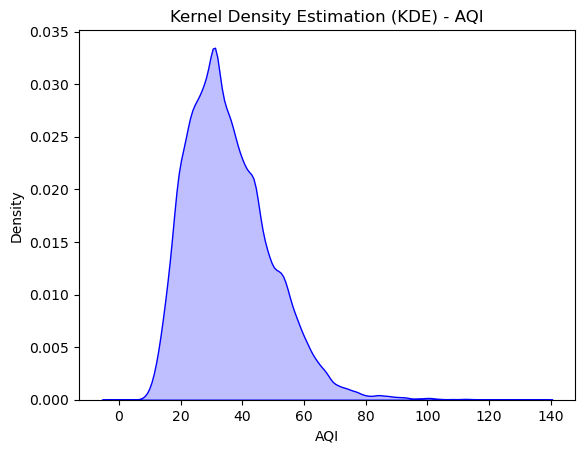

In [89]:
# Distribution of AQI with KDE

sns.kdeplot(data['aqi'], shade=True, color='blue')
plt.title("Kernel Density Estimation (KDE) - AQI")
plt.xlabel("AQI")
plt.ylabel("Density")
plt.show()


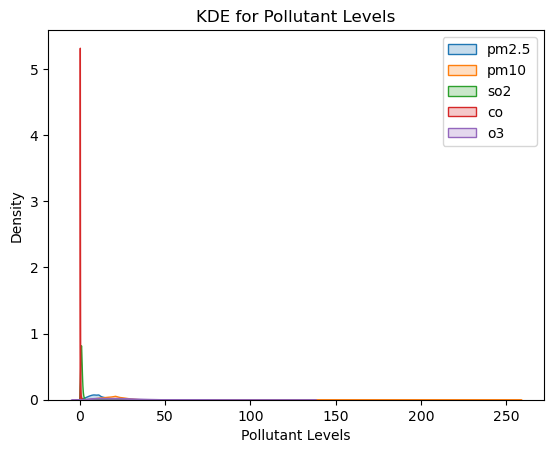

In [93]:
# KDE for multiple pollutants
pollutants = ['pm2.5', 'pm10', 'so2', 'co', 'o3']
for pollutant in pollutants:
    sns.kdeplot(data[pollutant], fill=True, label=pollutant)  
    
plt.title("KDE for Pollutant Levels")
plt.xlabel("Pollutant Levels")
plt.ylabel("Density")
plt.legend()
plt.show()

In [95]:
# Save descriptive statistics to a CSV file

data.describe().to_csv("eda_summary.csv")
print("EDA report saved as eda_summary.csv")


EDA report saved as eda_summary.csv


In [97]:
#Feature Engineering


categorical_columns = data.select_dtypes(include='object').columns
print(f"Categorical columns: {categorical_columns}")


data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


data_encoded.head()


Categorical columns: Index(['county', 'pollutant', 'status', 'windspeed', 'winddirec'], dtype='object')


aqi  so2    co    o3  o3_8hr  pm10  pm2.5  no2  nox   no  ...  \
date                                                                   ...   
2024-08-01  22.0  0.6  0.11  17.3    18.6  12.0    5.0  1.6  2.4  0.7  ...   
2024-08-01  21.0  0.8  0.17  14.1    18.0  15.0    6.0  5.6  6.0  0.4  ...   
2024-08-01  18.0  0.9  0.19  20.0    19.6  10.0    4.0  1.7  2.6  0.9  ...   
2024-08-01  26.0  0.4  0.16   7.9    13.0  21.0   11.0  4.4  5.0  0.6  ...   
2024-08-01  19.0  0.3  0.11  17.6    19.7   7.0    4.0  3.2  4.4  1.2  ...   

            winddirec_90  winddirec_91  winddirec_92  winddirec_93  \
date                                                                 
2024-08-01         False         False         False         False   
2024-08-01         False         False         False         False   
2024-08-01         False         False         False         False   
2024-08-01         False         False         False         False   
2024-08-01         False         False         False         False   

            winddirec_94  winddirec_95  winddirec_96  winddirec_97  \
date                                                                 
2024-08-01         False         False         False         False   
2024-08-01         False         False         False         False   
2024-08-01         False         False         False         False   
2024-08-01         False         False         False         False   
2024-08-01         False         False         False         False   

            winddirec_98  winddirec_99  
date                                    
2024-08-01         False         False  
2024-08-01         False         False  
2024-08-01         False         False  
2024-08-01         False         False  
2024-08-01         False         False  

[5 rows x 503 columns]

      Feature  Importance
14  pm2.5_avg    0.844041
5      o3_8hr    0.129092
8         no2    0.015322
15   pm10_avg    0.009283
4          o3    0.000432
7       pm2.5    0.000307
2         so2    0.000300
6        pm10    0.000222
9         nox    0.000198
3          co    0.000175
10         no    0.000146
12  winddirec    0.000139
11  windspeed    0.000112
18   latitude    0.000105
17  longitude    0.000082
16    so2_avg    0.000027
13     co_8hr    0.000017
1      status    0.000000
0   pollutant    0.000000


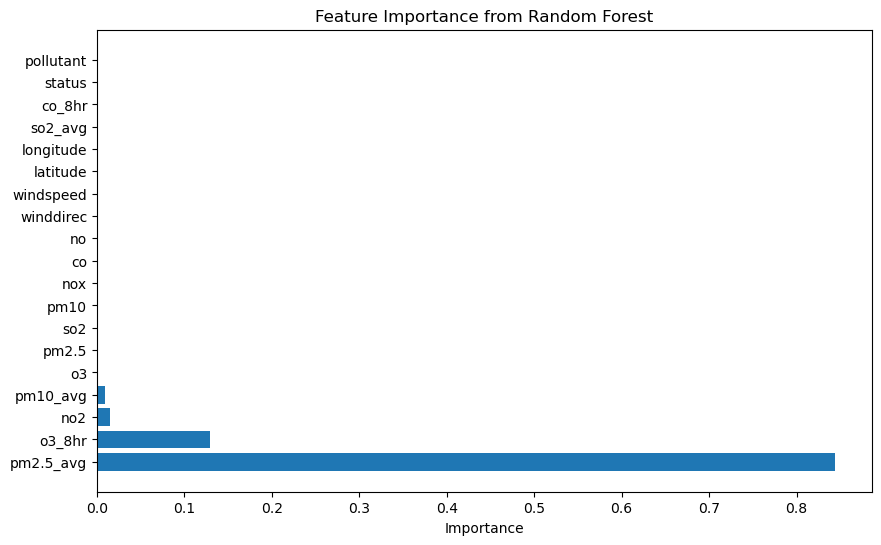

In [139]:
#Feature Selection using Random Forest


data.replace('-', np.nan, inplace=True)


data = data.apply(pd.to_numeric, errors='coerce')


data.fillna(data.mean(), inplace=True)


X = data.drop(['aqi', 'county', 'unit'], axis=1)  
y = data['aqi']


label_encoder = LabelEncoder()


X['pollutant'] = label_encoder.fit_transform(X['pollutant'])
X['status'] = label_encoder.fit_transform(X['status'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)


importance = rf_model.feature_importances_


feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


print(feature_importance_df)


plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

In [143]:
#Feature Selection using Select K Best



selector = SelectKBest(score_func=f_regression, k='all')  


selector.fit(X, y)


scores = selector.scores_


feature_scores_df = pd.DataFrame({
    'Feature': X.columns,
    'Score': scores})


feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)


print(feature_scores_df)

      Feature          Score
14  pm2.5_avg  348477.760318
7       pm2.5  101279.744752
15   pm10_avg   57339.634443
6        pm10   22921.023721
5      o3_8hr   22782.288958
4          o3   11167.401846
18   latitude    7479.480499
13     co_8hr    6869.679296
8         no2    6754.052582
3          co    6056.447530
9         nox    4322.709520
2         so2    1469.547600
16    so2_avg    1458.132524
10         no    1191.752946
17  longitude     587.556156
12  winddirec      25.115490
11  windspeed       4.303269
1      status       0.000000
0   pollutant       0.000000


In [147]:
#Remove Redundant or Irrelevant Features


corr_matrix = X.corr()


threshold = 0.9
drop_cols = []

for col in corr_matrix.columns:
    if any(corr_matrix[col].abs() > threshold) and col not in drop_cols:
        drop_cols.append(col)


X_reduced = X.drop(columns=drop_cols)


print(f"Features dropped due to high correlation: {drop_cols}")
print("Remaining features:", X_reduced.columns)


Features dropped due to high correlation: ['so2', 'co', 'o3', 'o3_8hr', 'pm10', 'pm2.5', 'no2', 'nox', 'no', 'windspeed', 'winddirec', 'co_8hr', 'pm2.5_avg', 'pm10_avg', 'so2_avg', 'longitude', 'latitude']
Remaining features: Index(['pollutant', 'status'], dtype='object')
